# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks


# Before starting, please:
- Fetch the most up-to-date version of the github repository.
- Create a new branch with your name, based on the "main" branch and switch to your own branch.
- Copy this notebook to the work space of your group, and rename it to TD_WP_1_Your name.ipynb
- After finishing this task, push your changes to the github repository of your group.

# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

20240105_164214: 0    Robot not moving, just starting up.
Name: Description, dtype: object



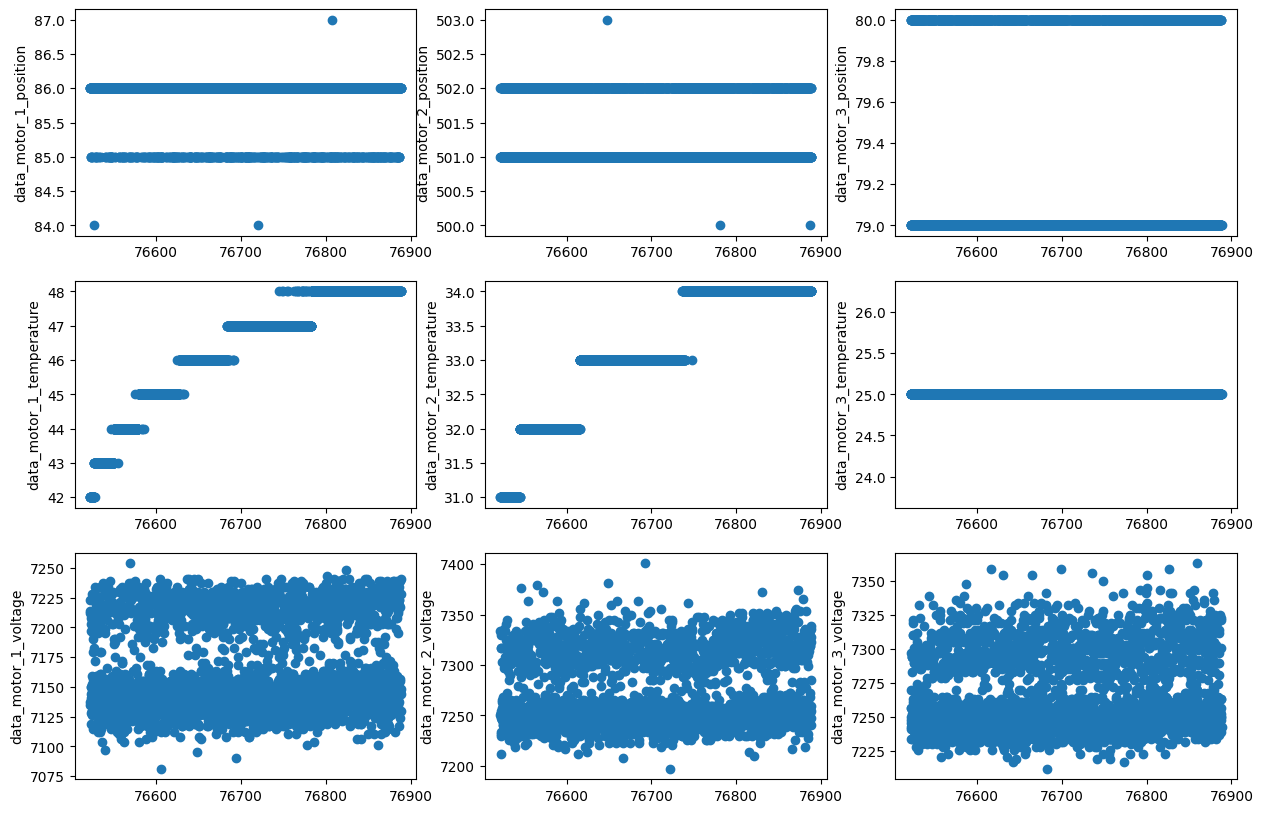

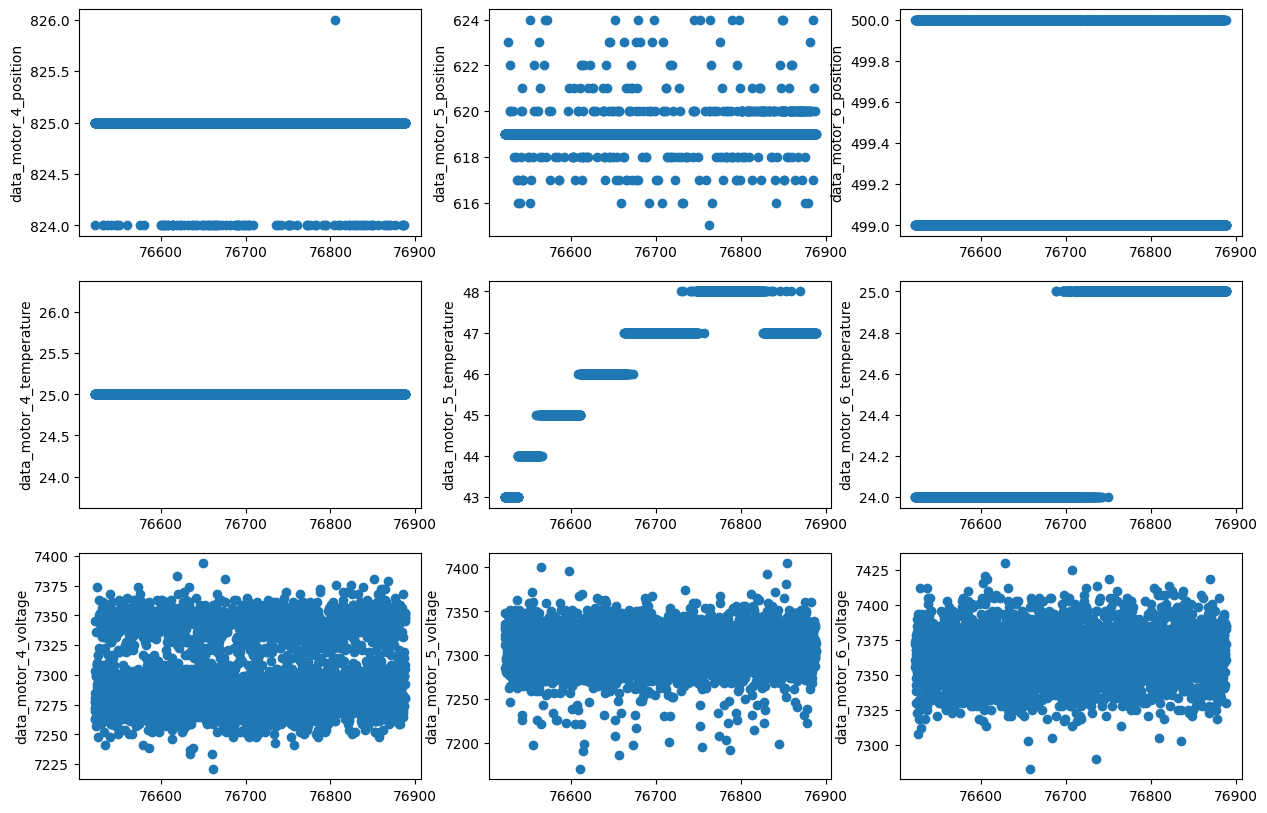

20240105_165300: 1    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



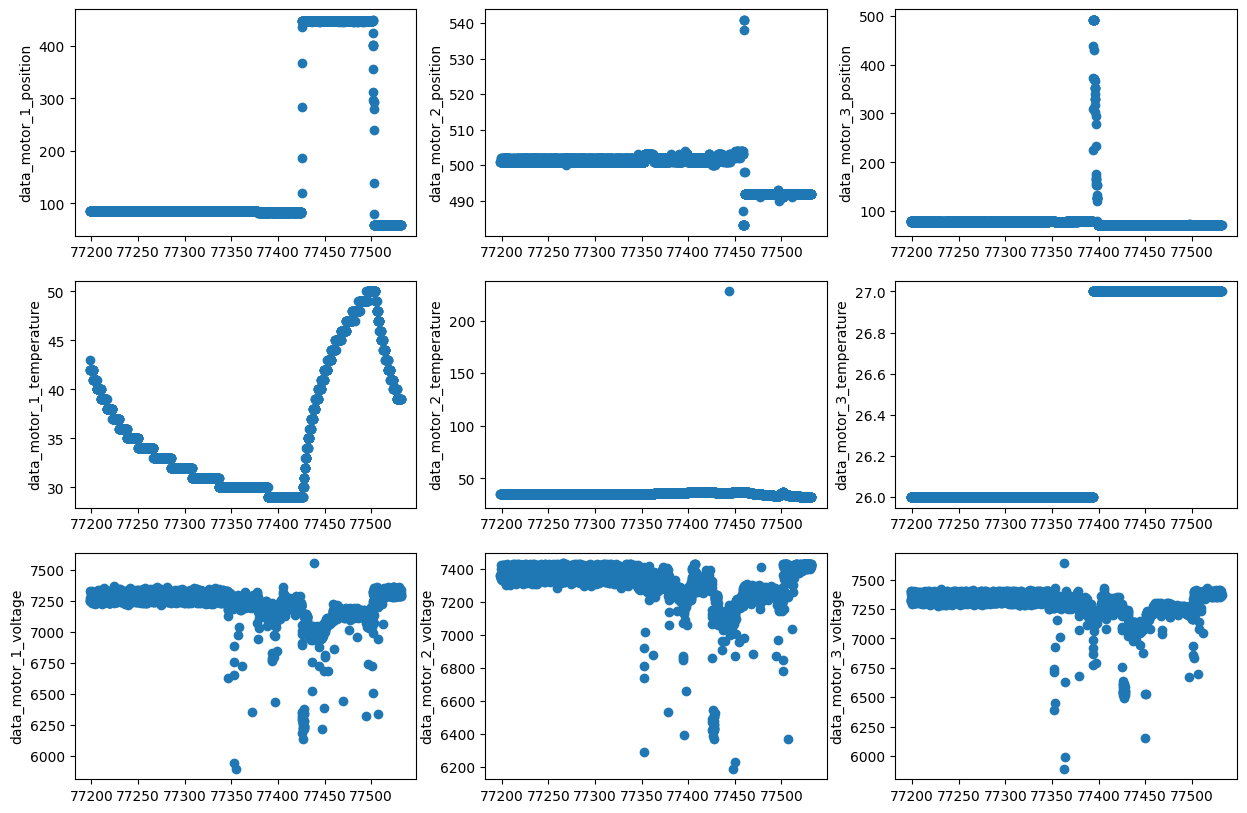

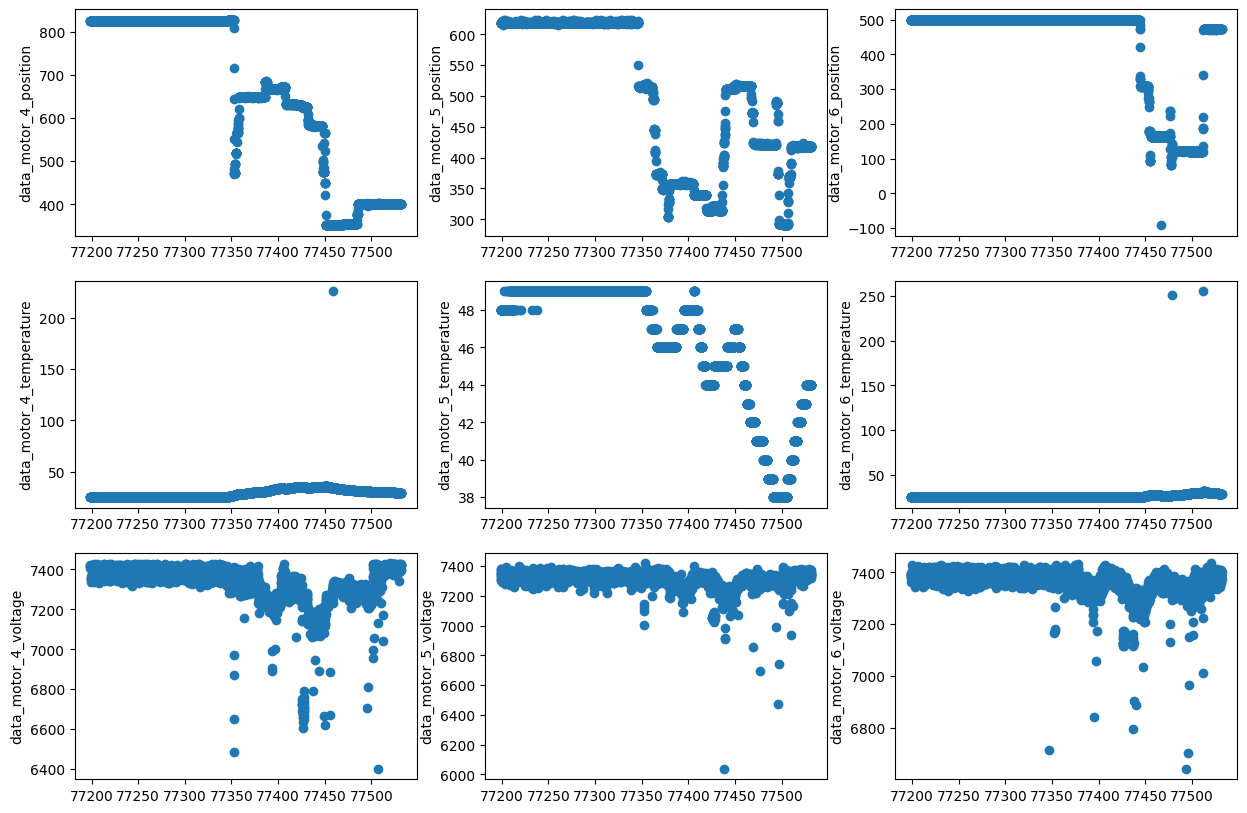

20240105_165972: 2    Not moving. After the operation.
Name: Description, dtype: object



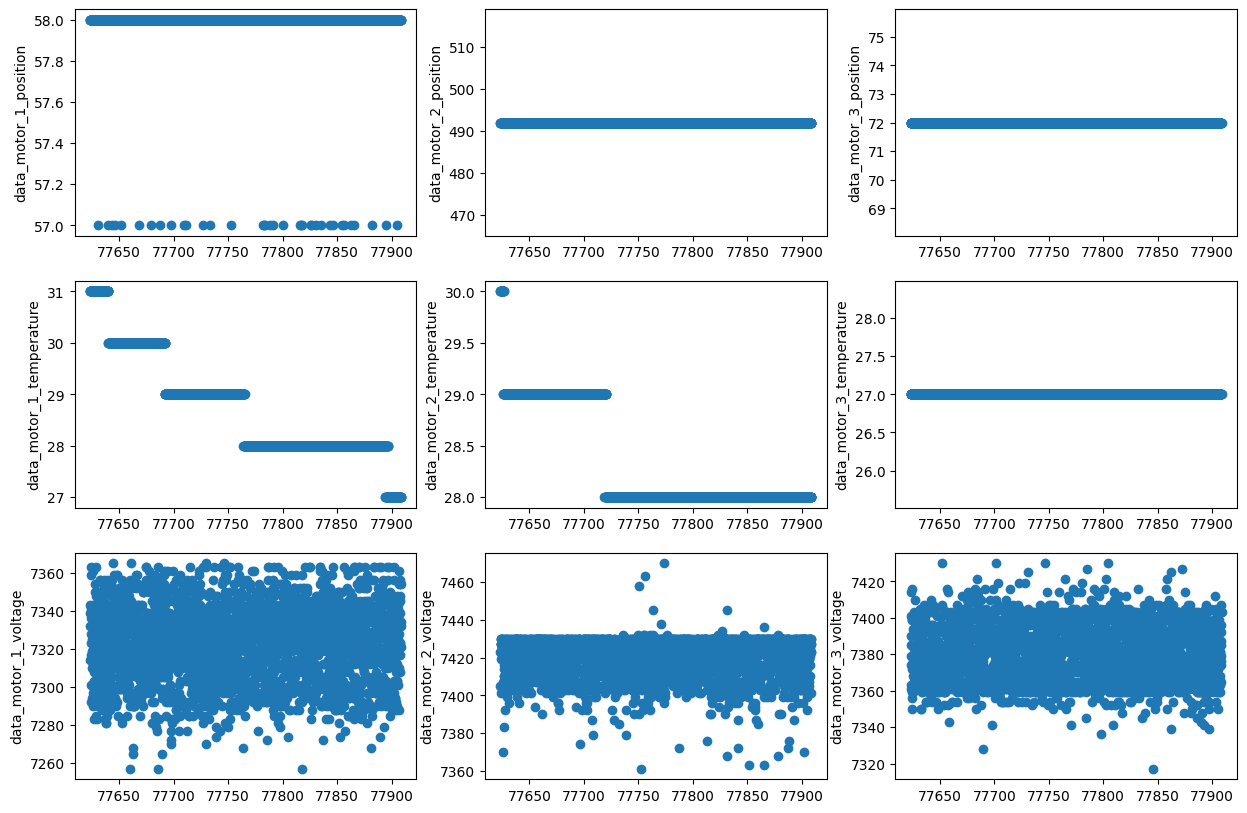

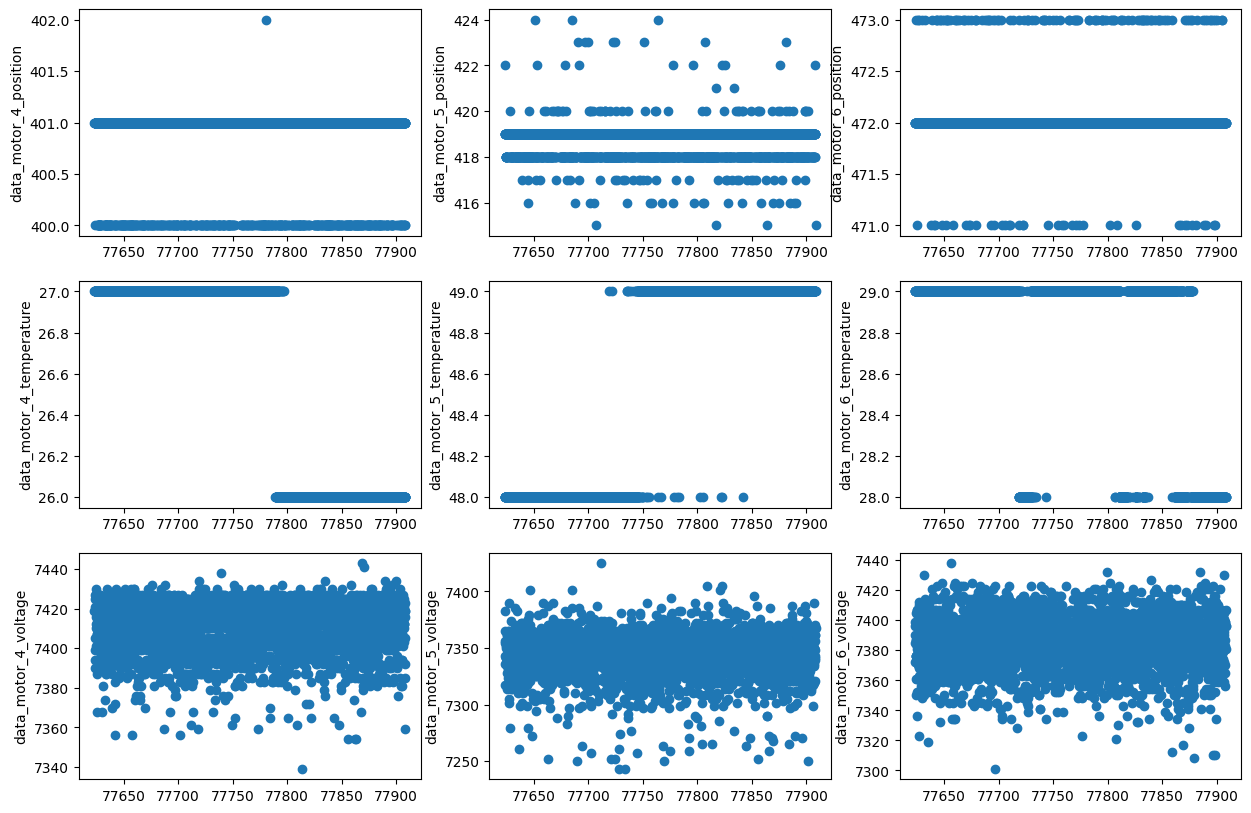

20240320_152031: 3    Robot not moving, just starting up.
Name: Description, dtype: object



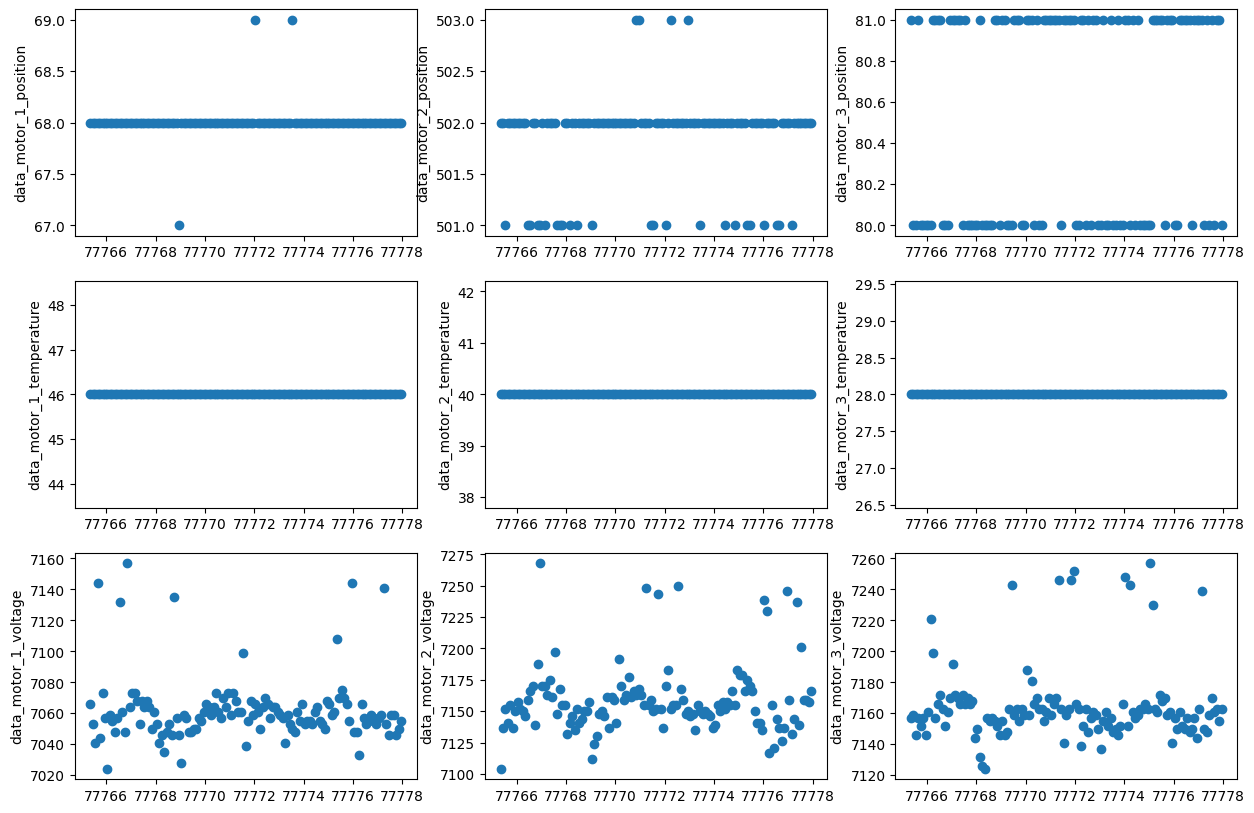

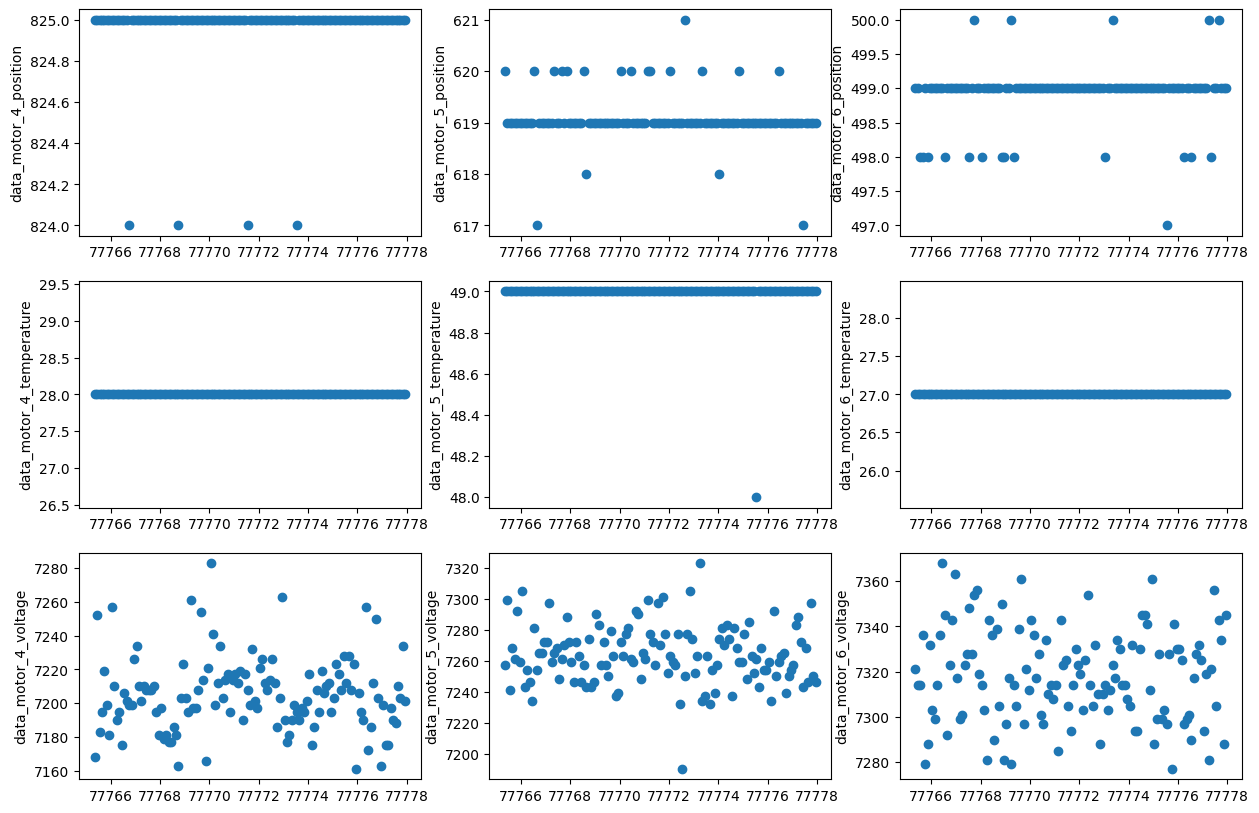

20240320_153841: 4    Not moving. Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



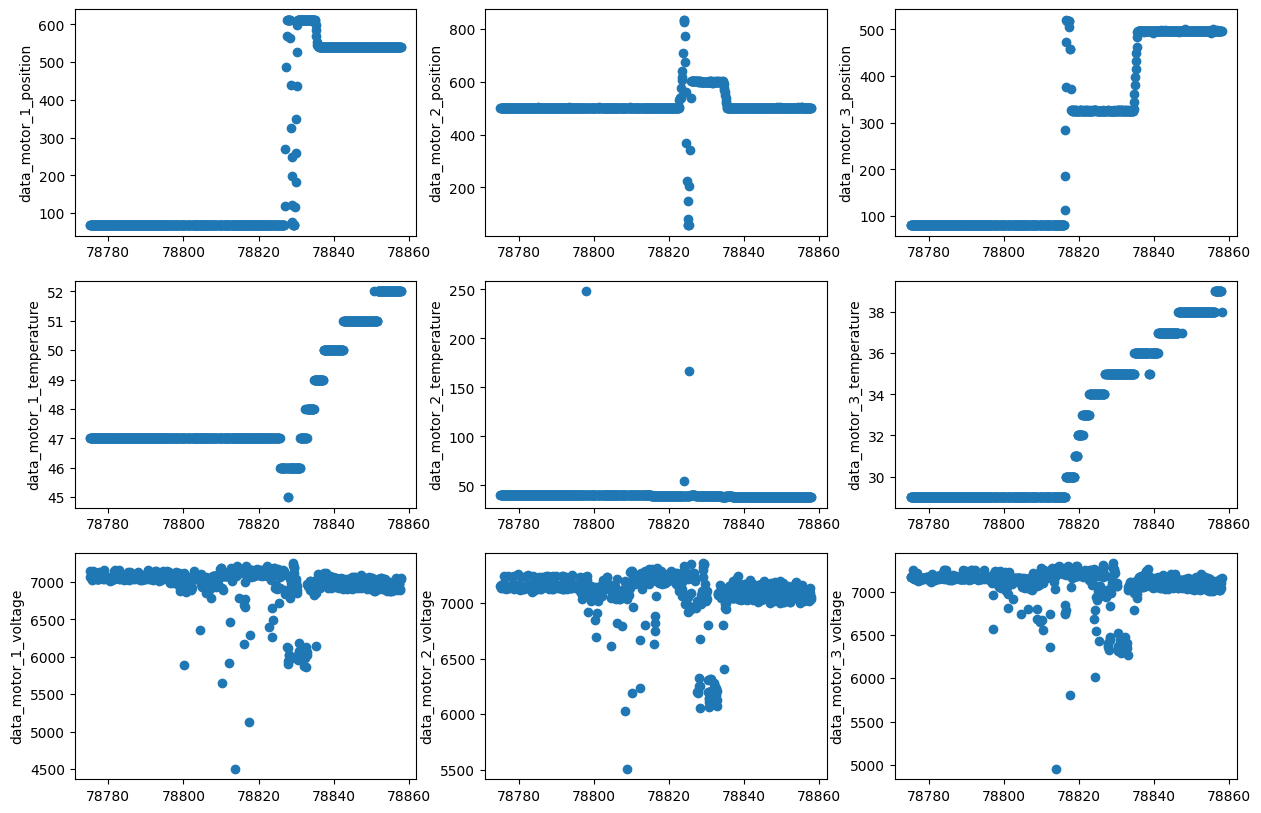

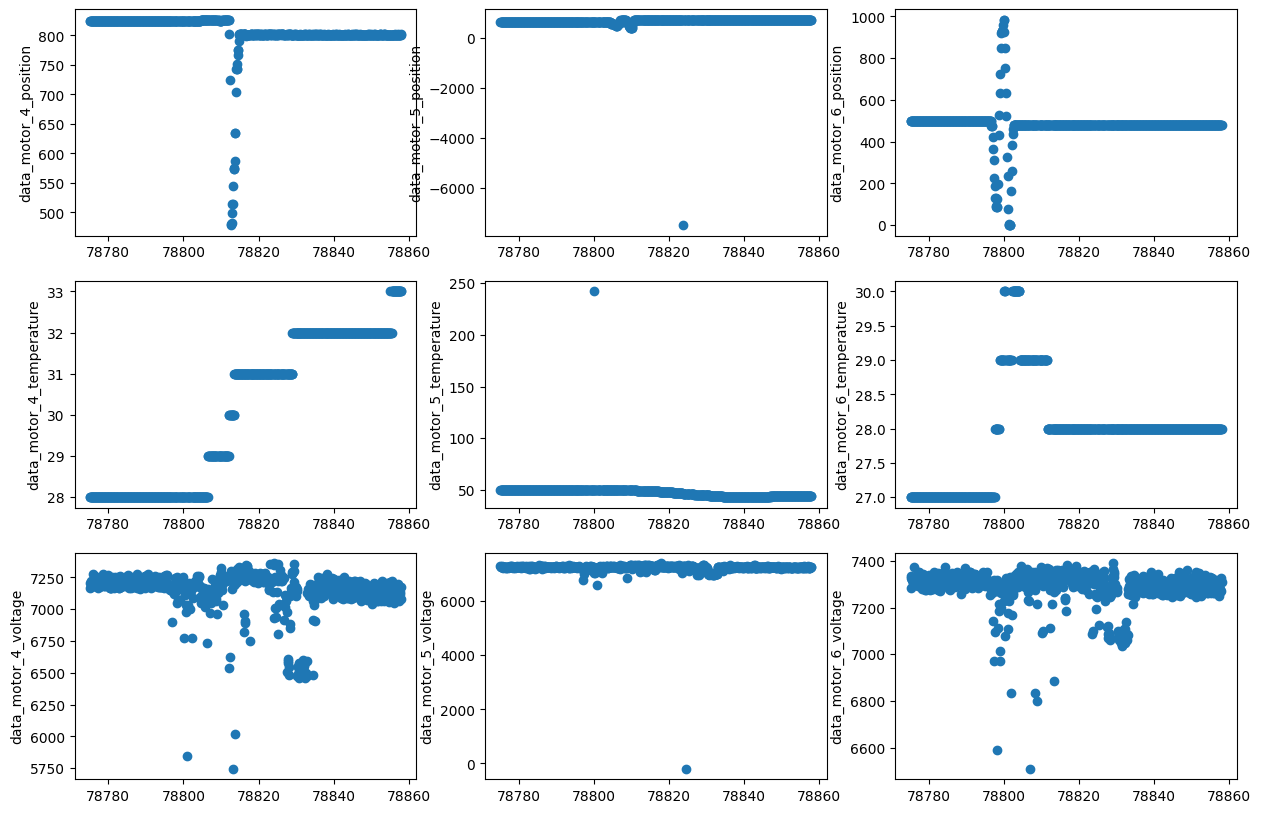

20240320_155664: 5    Robot not moving.
Name: Description, dtype: object



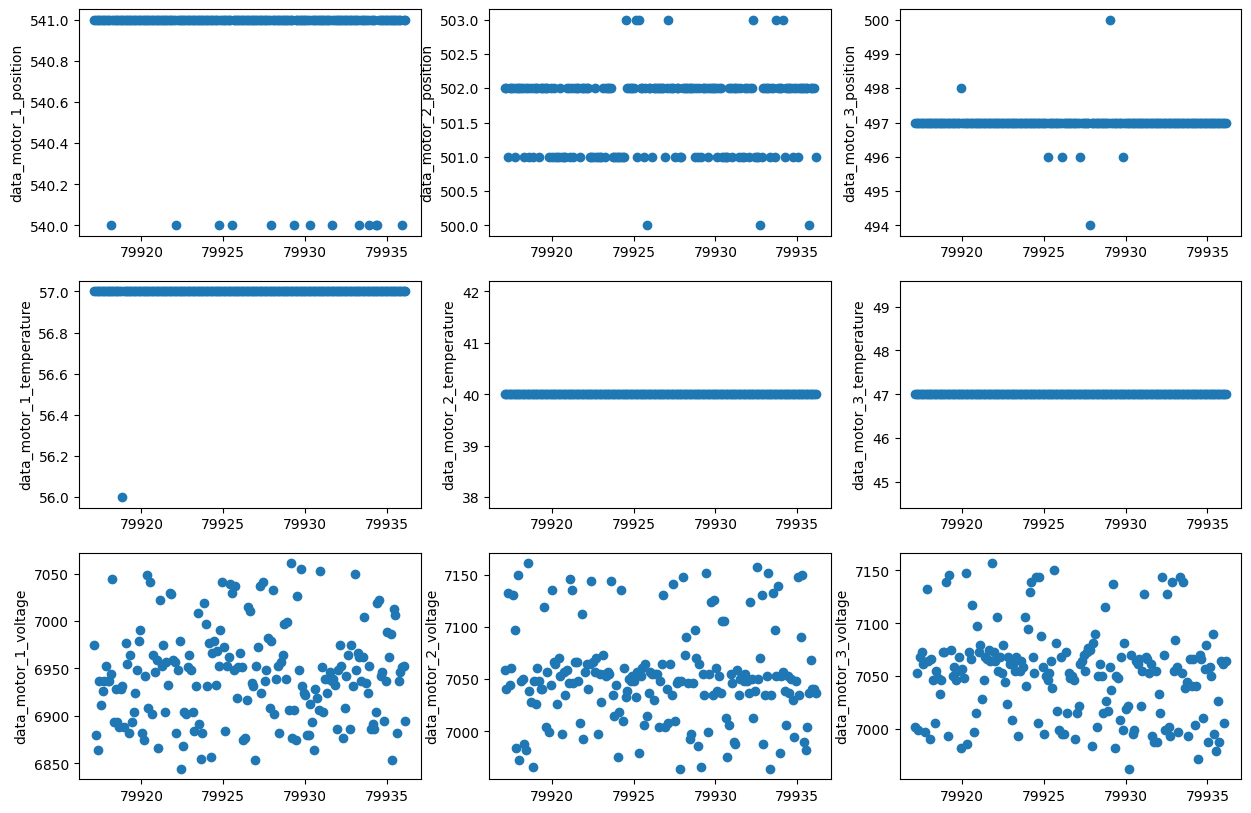

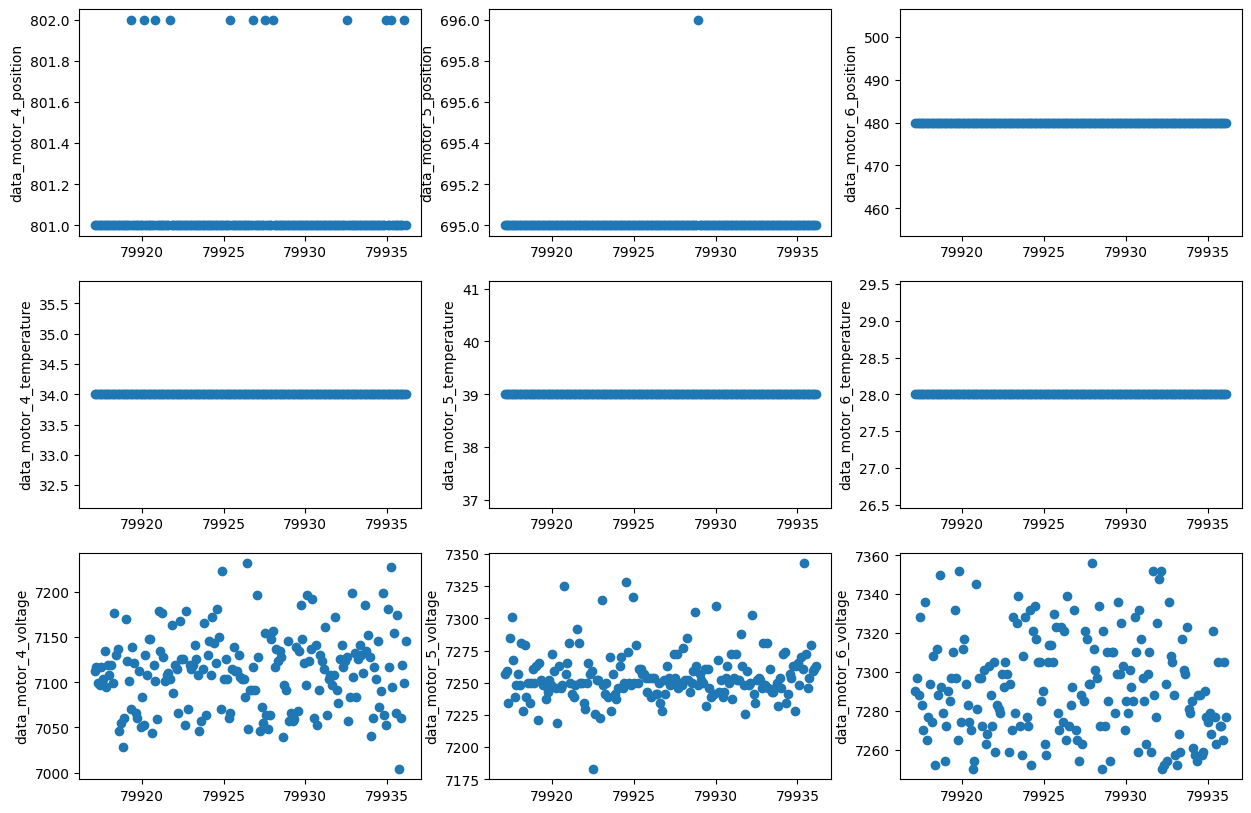

20240321_122650: 6    Try to move to pick up an item from second flo...
Name: Description, dtype: object



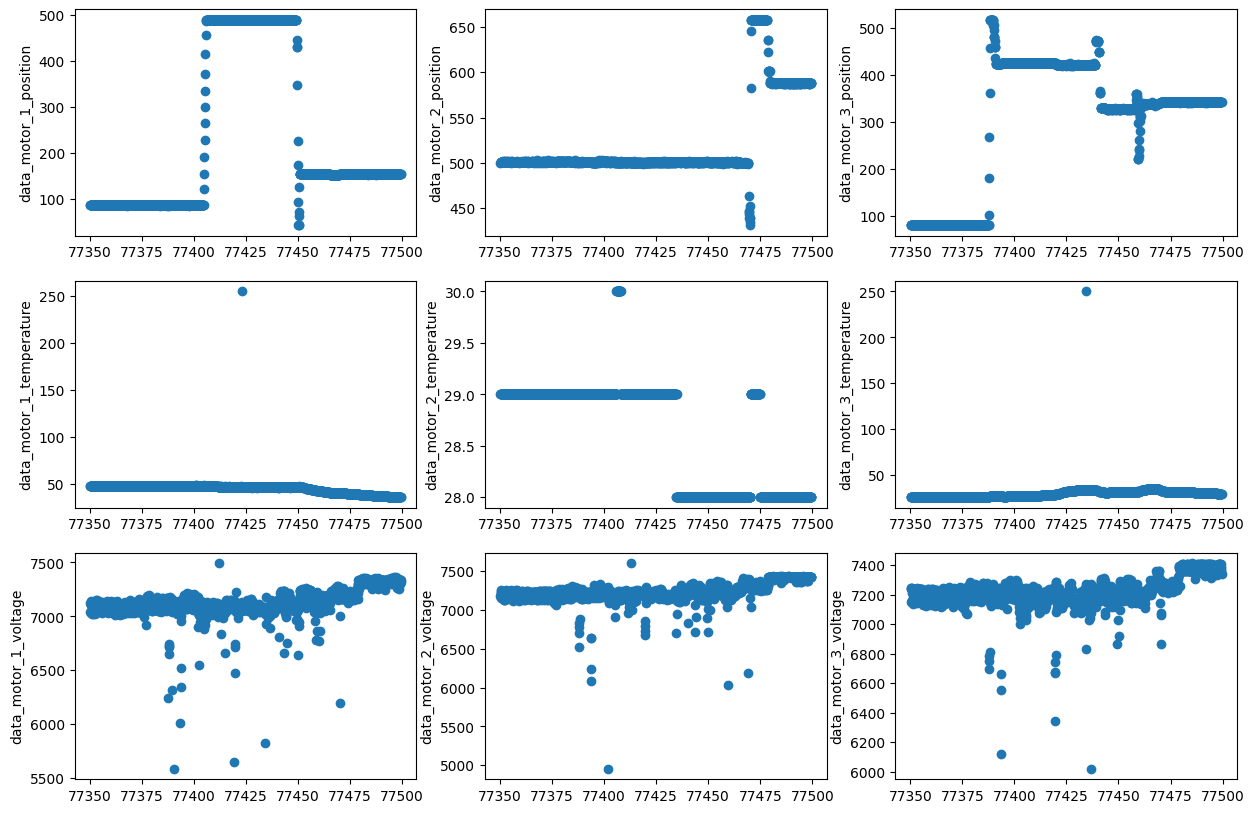

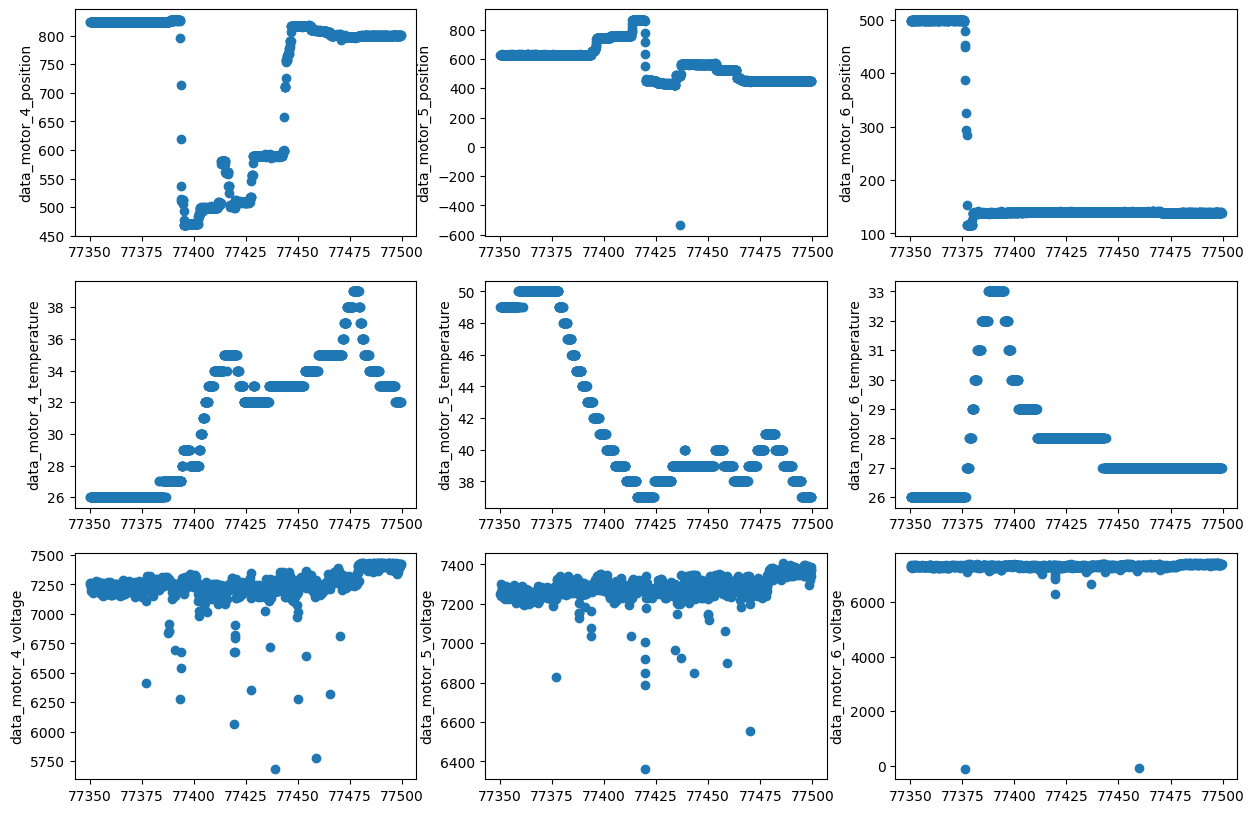

20240325_135213: 7    Robot not moving, just starting up.
Name: Description, dtype: object



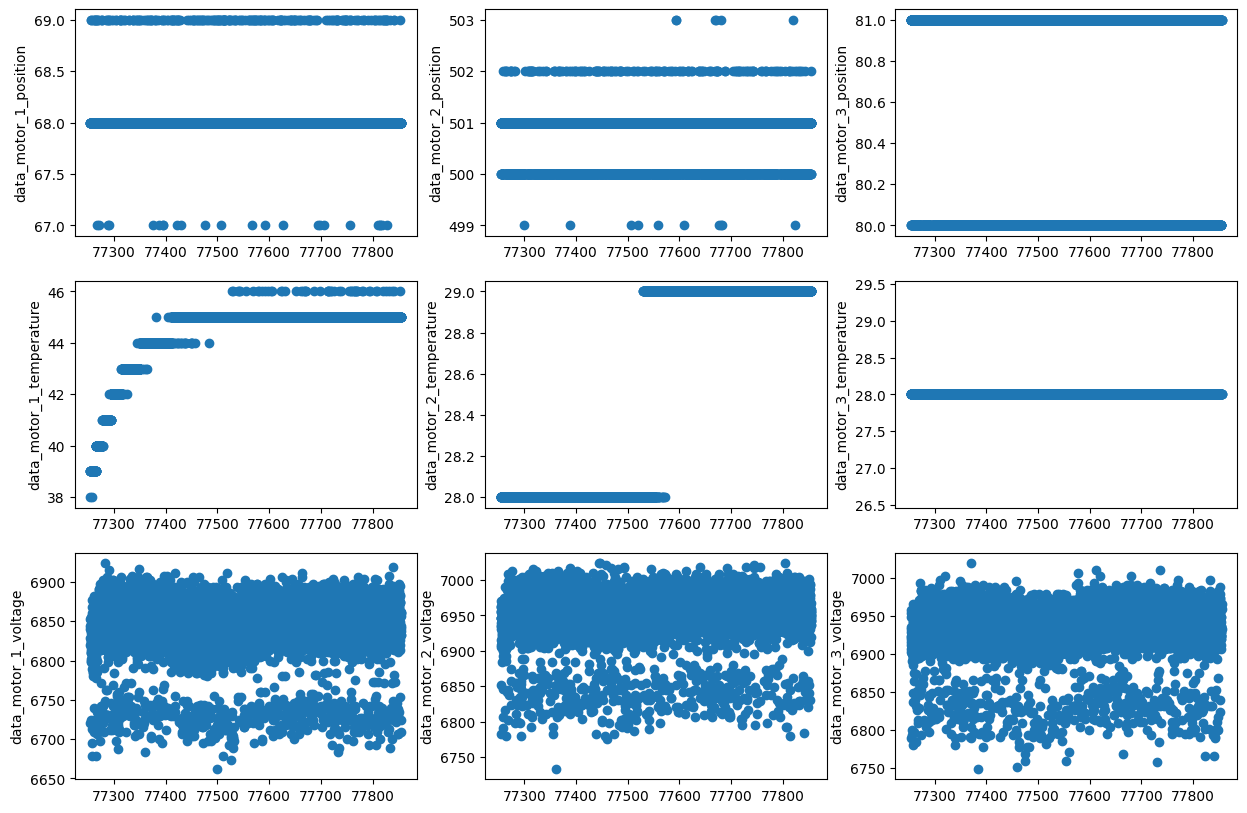

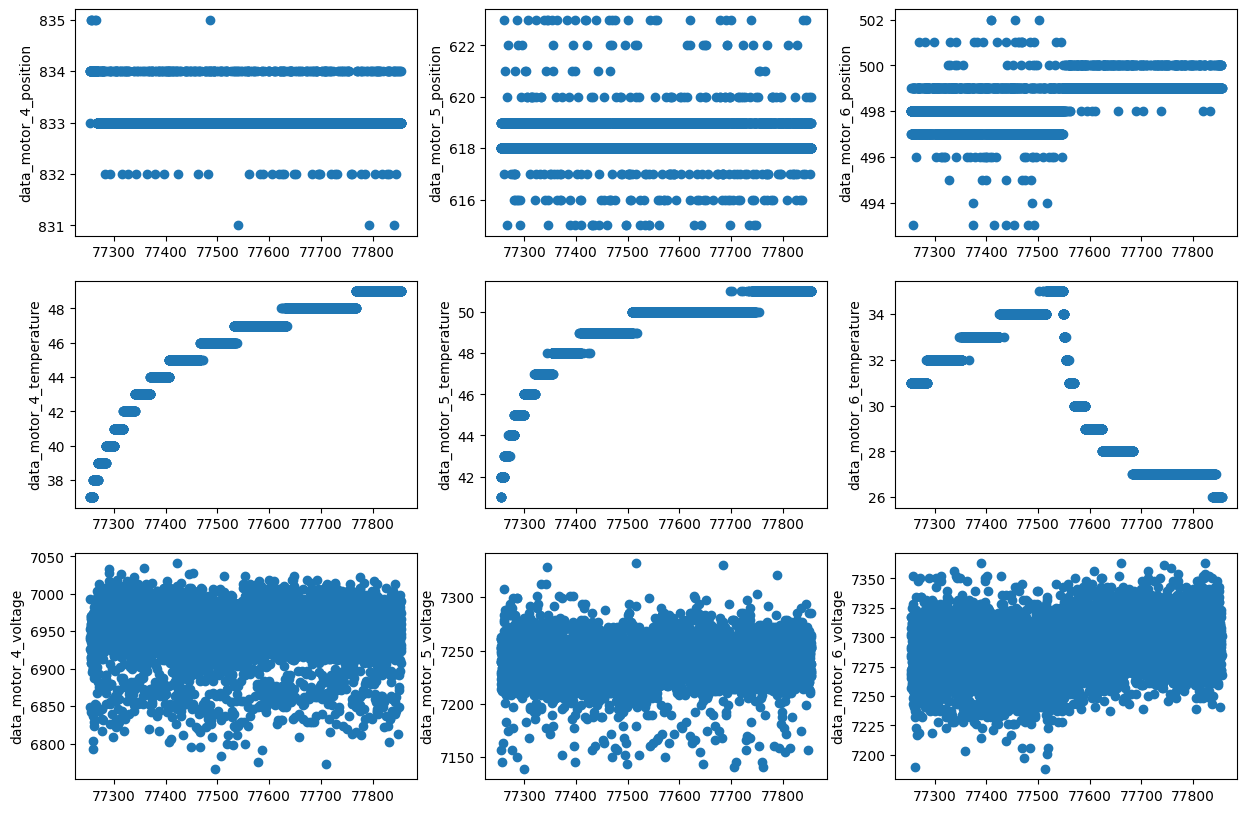

20240325_152902: 8    Not moving. Then perform a pick-up and place o...
Name: Description, dtype: object



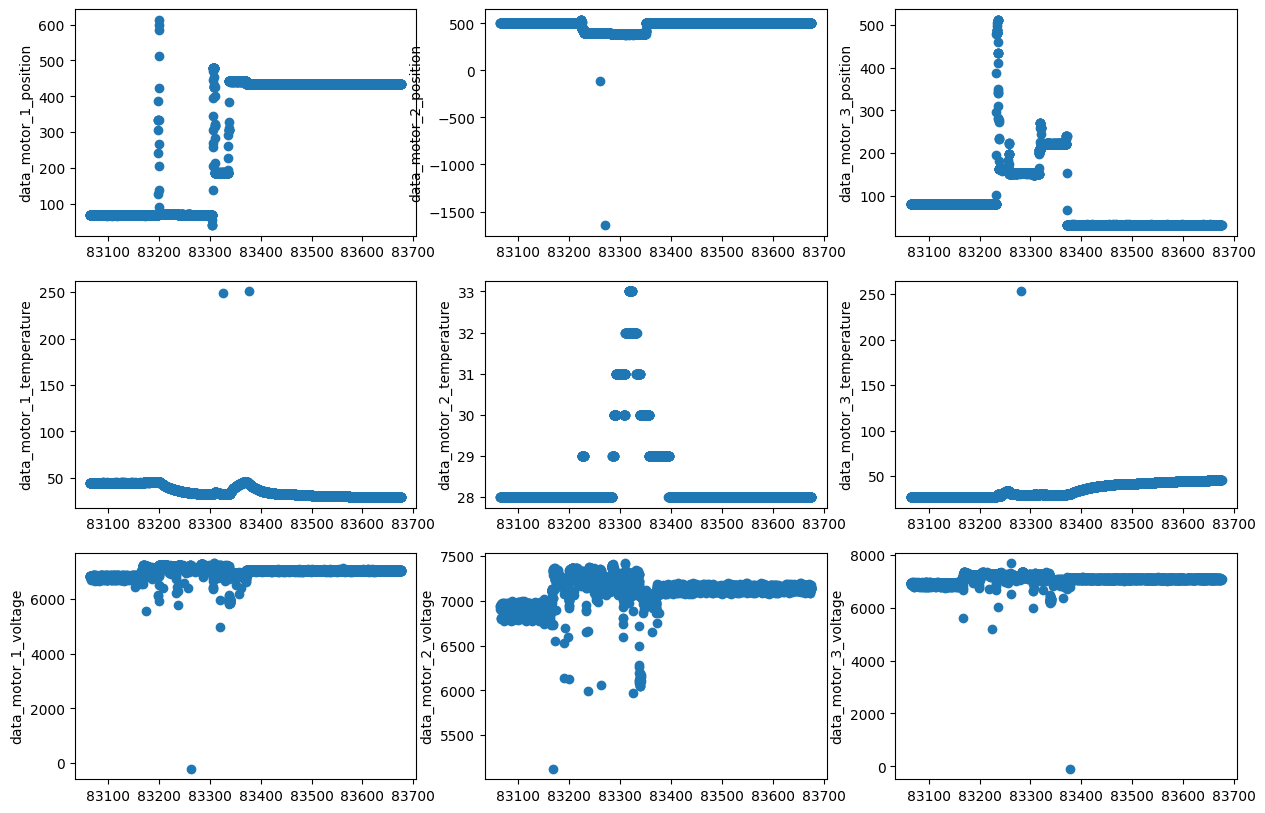

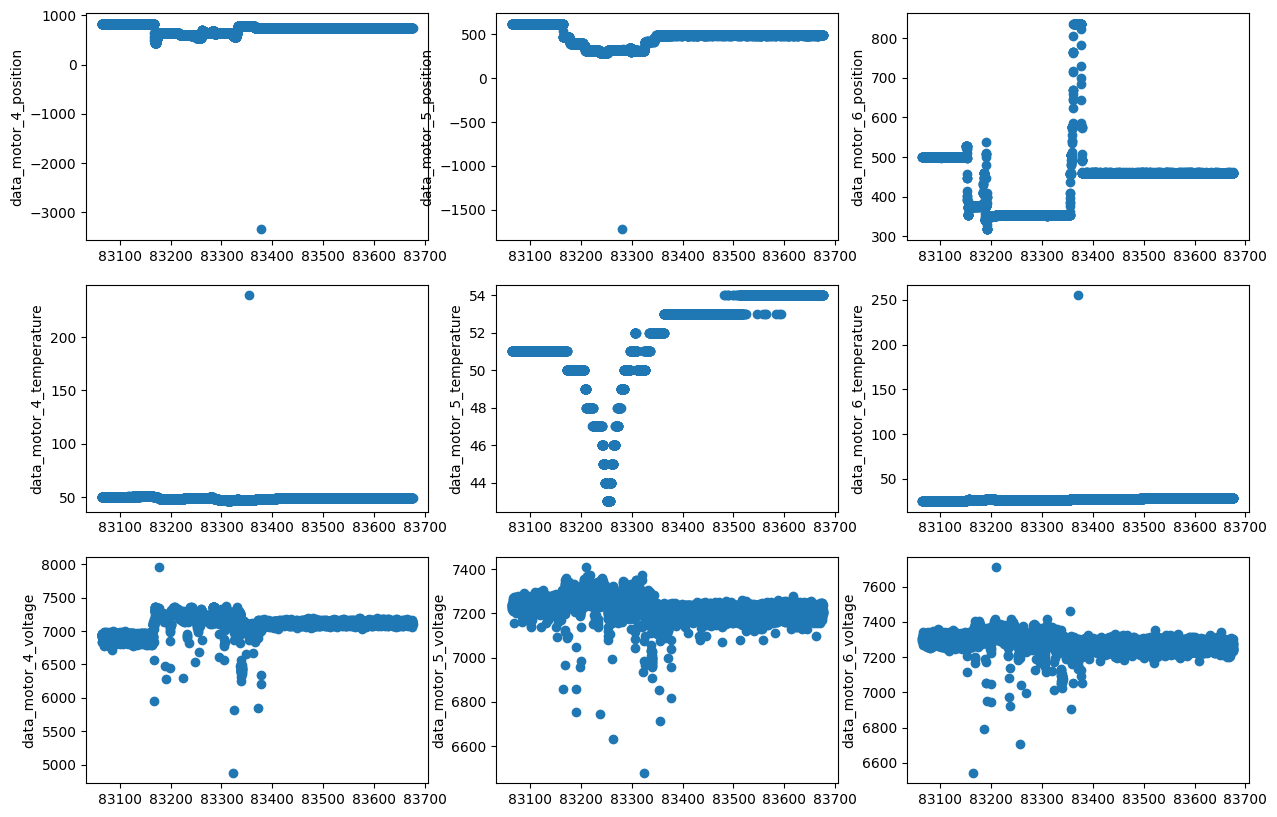

20240325_155003: 9    Starting position: Straigt. Perform two operat...
Name: Description, dtype: object



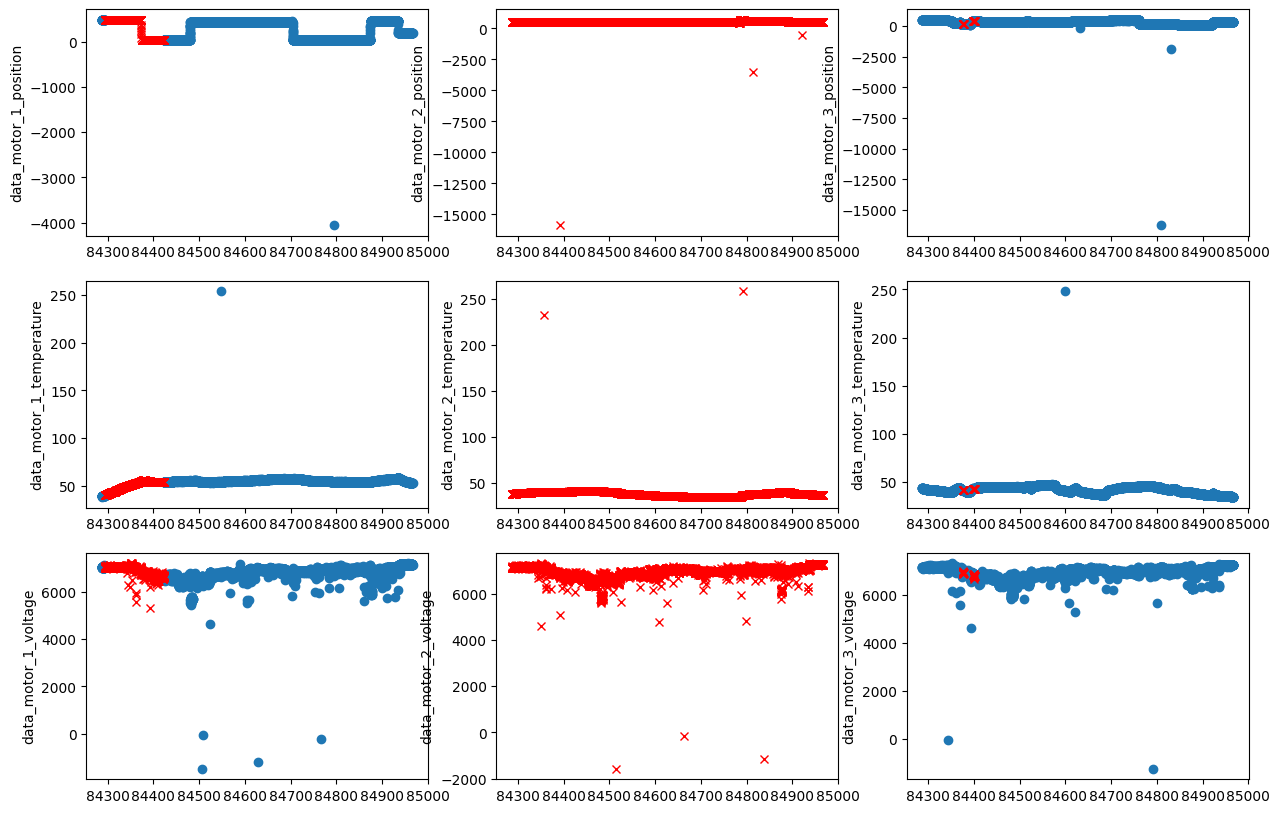

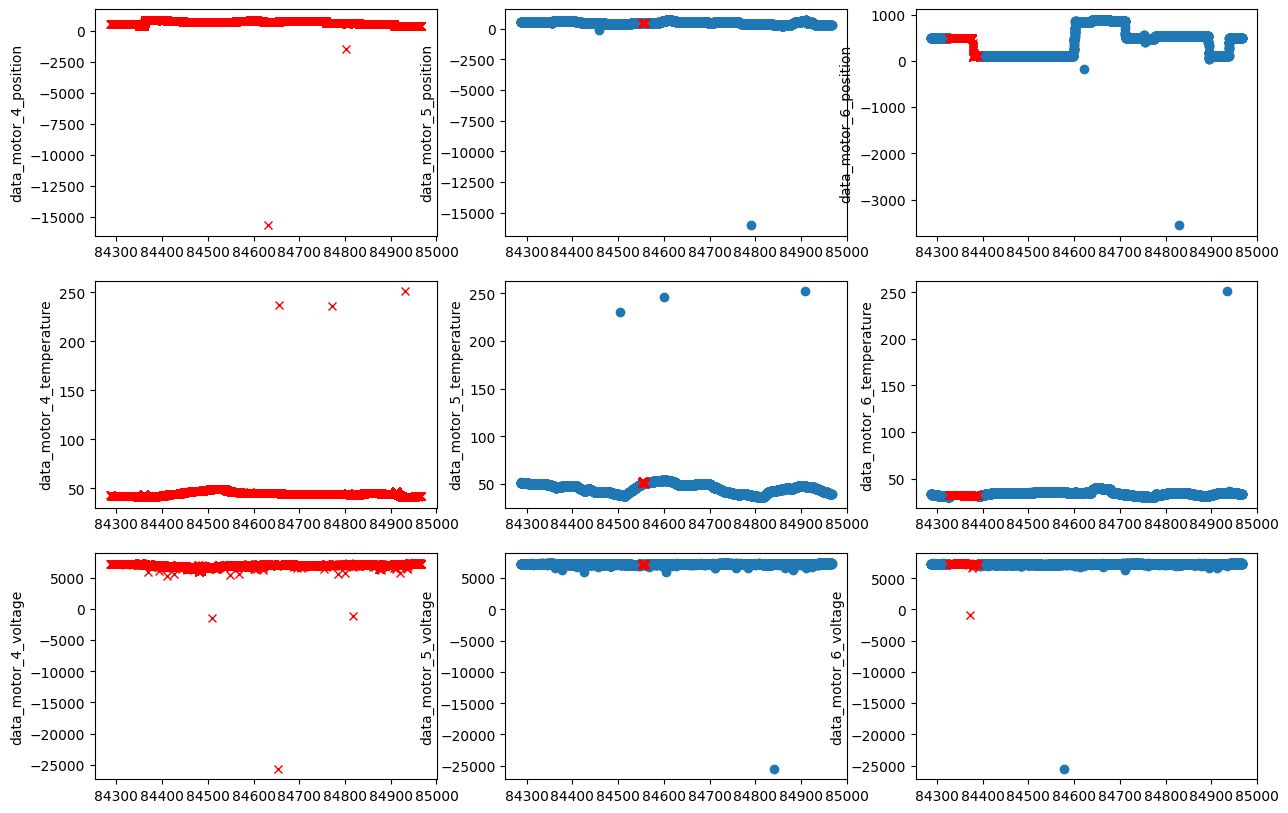

,time,data_motor_1_position,data_motor_1_temperature,data_motor_1_voltage,data_motor_1_label,data_motor_2_position,data_motor_2_temperature,data_motor_2_voltage,data_motor_2_label,data_motor_3_position,...,data_motor_6_label,data_motor_4_position,data_motor_4_temperature,data_motor_4_voltage,data_motor_4_label,data_motor_5_position,data_motor_5_temperature,data_motor_5_voltage,data_motor_5_label,test_condition
0,76522.025433,86,42,7223,0,501,31,7334,0,80,...,0,825,25,7270,0,619,43,7312,0,20240105_164214
1,76522.125464,86,42,7214,0,502,31,7250,0,80,...,0,825,25,7345,0,619,43,7332,0,20240105_164214
2,76522.225432,86,42,7137,0,501,31,7234,0,79,...,0,825,25,7277,0,619,43,7330,0,20240105_164214
3,76522.325432,86,42,7135,0,501,31,7250,0,79,...,0,825,25,7263,0,619,43,7319,0,20240105_164214
4,76522.425451,86,42,7212,0,502,31,7232,0,79,...,0,824,25,7303,0,619,43,7348,0,20240105_164214


In [6]:
# Your code here.
from utility import read_all_test_data_from_path
import pandas as pd

# Specify path to the dictionary.
base_dictionary = '../../dataset/training_data/'

# Read the data.
df_data = read_all_test_data_from_path(base_dictionary)
df_data.head()

Please explain the structure (what does each column represent) of the resulted dataframe here.

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

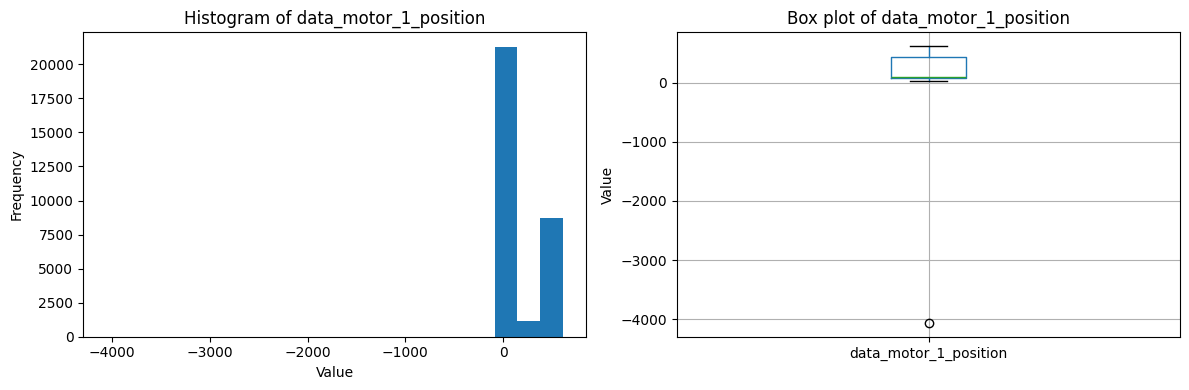

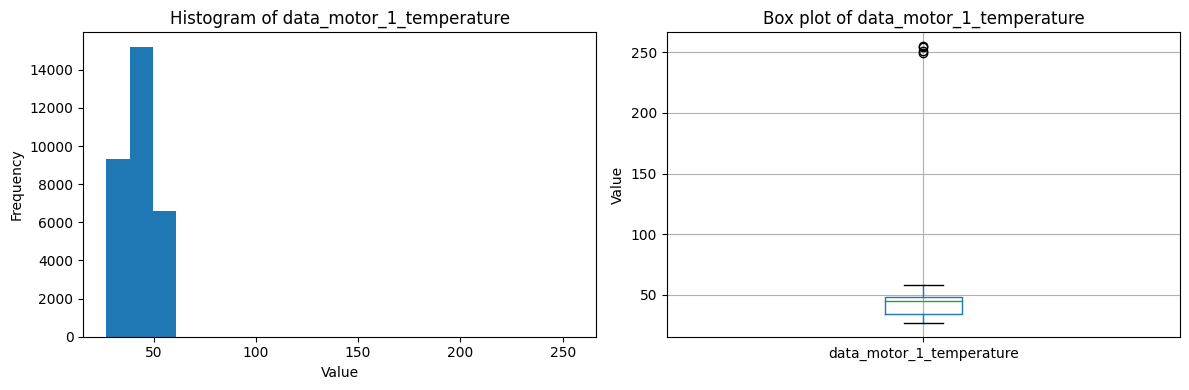

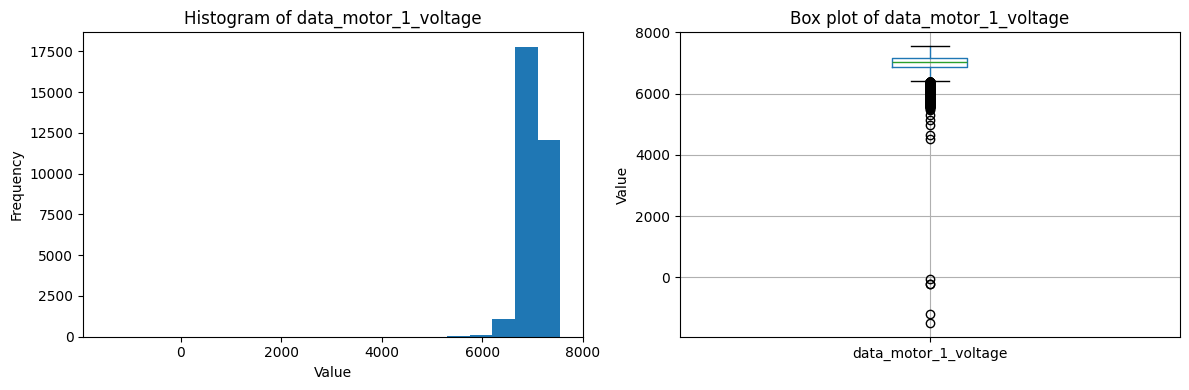

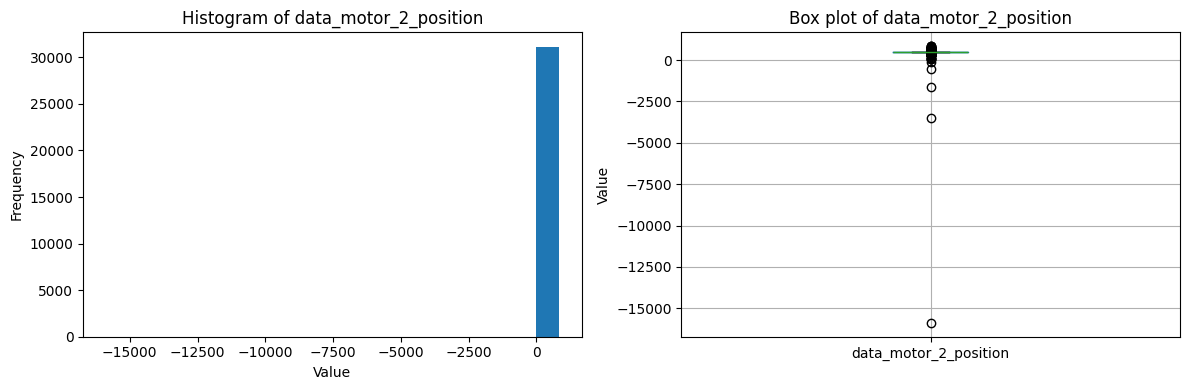

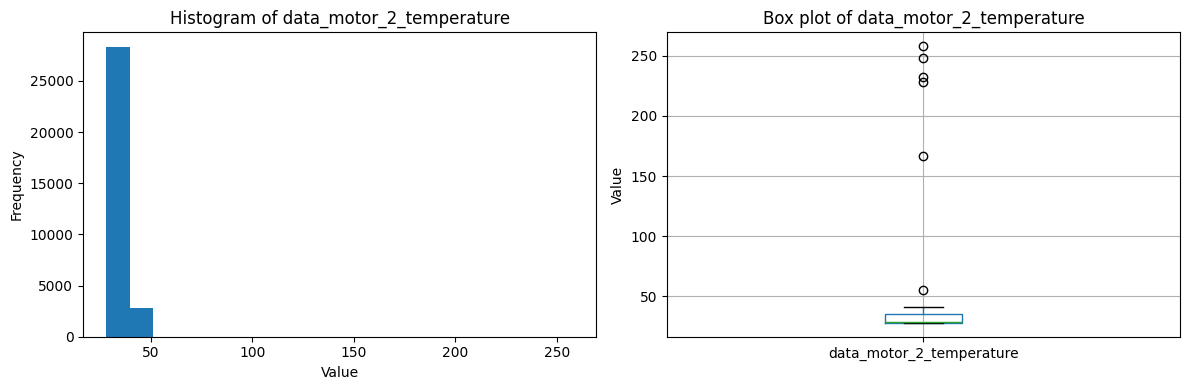

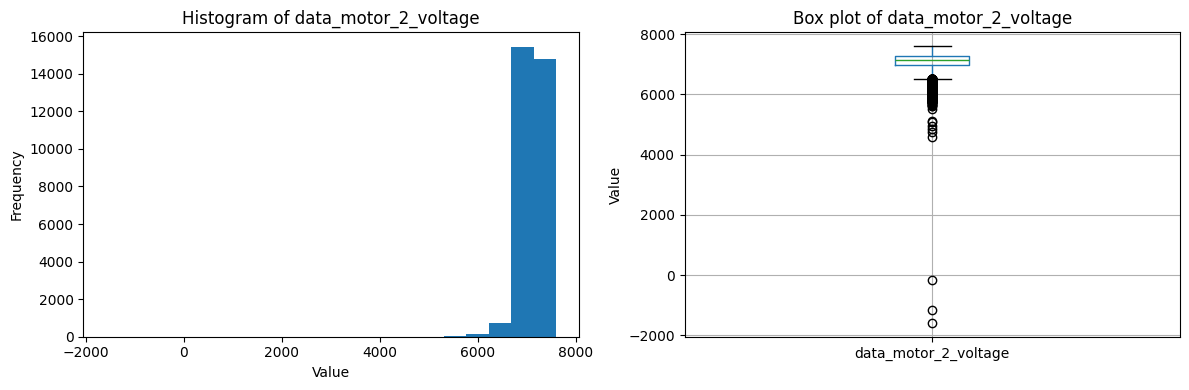

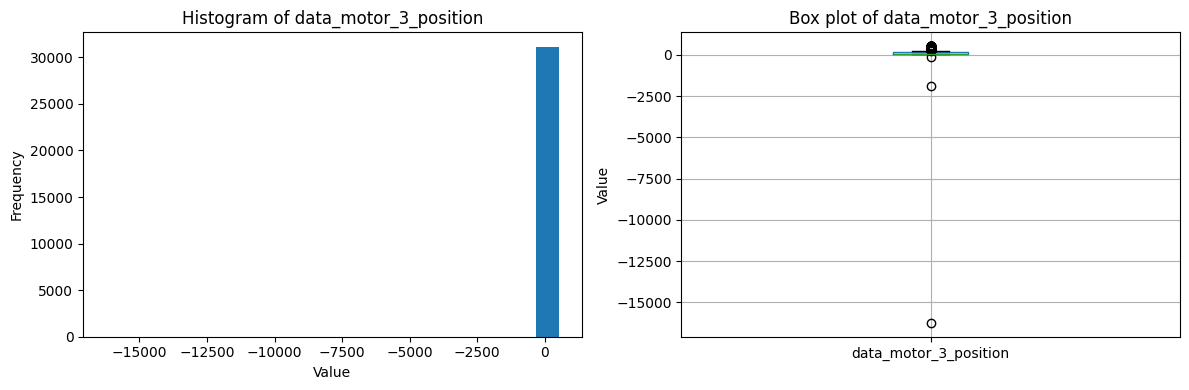

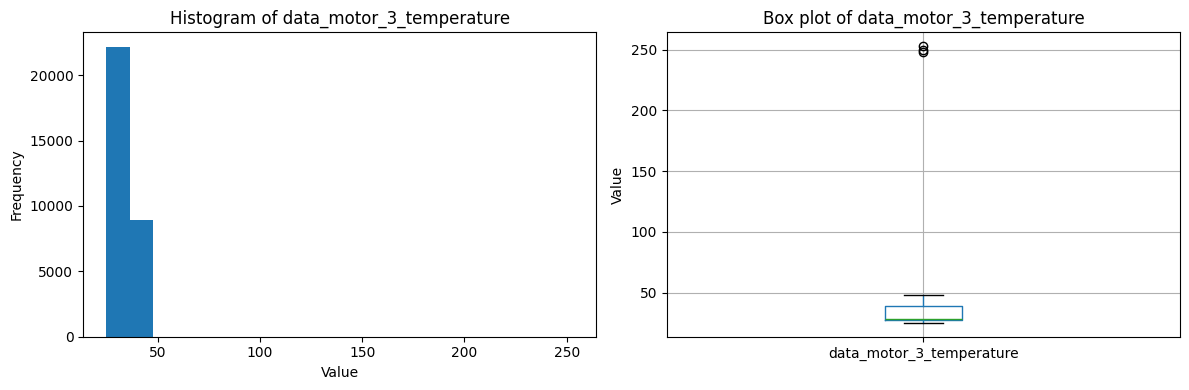

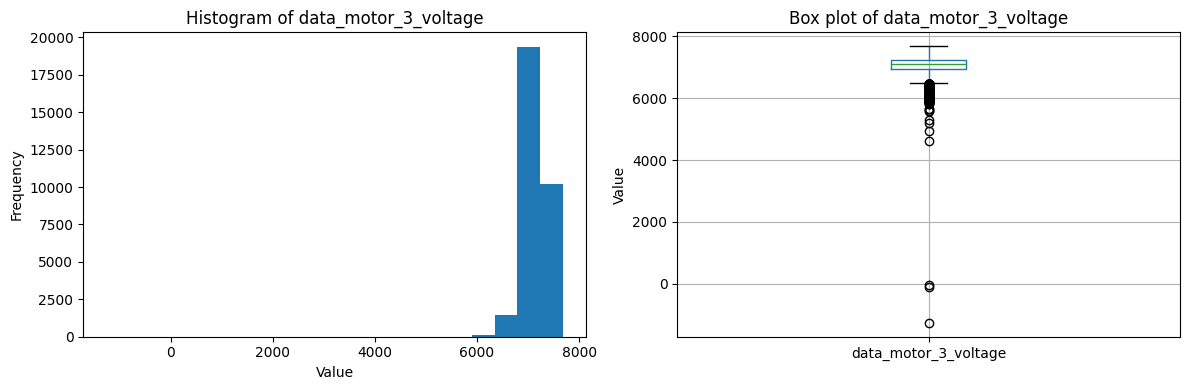

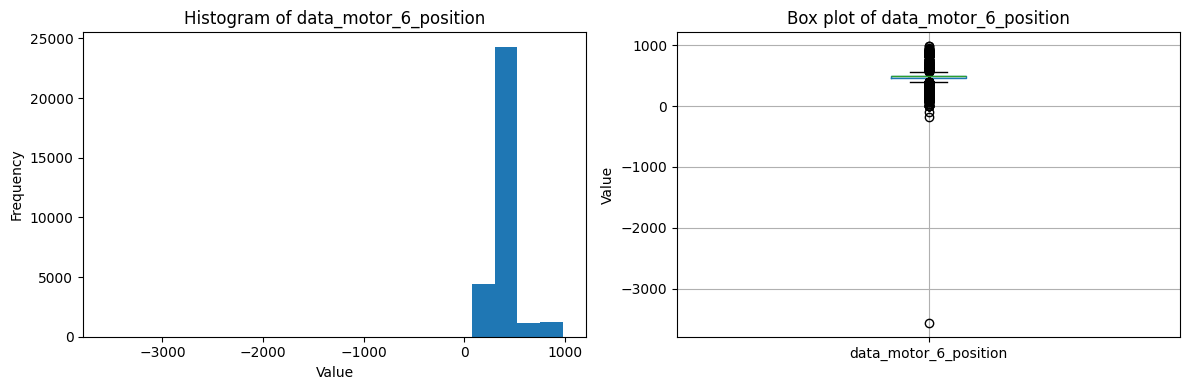

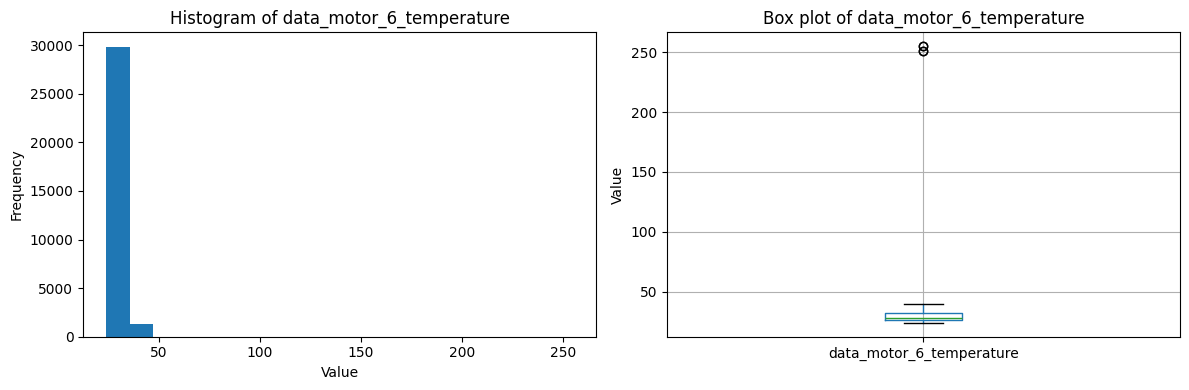

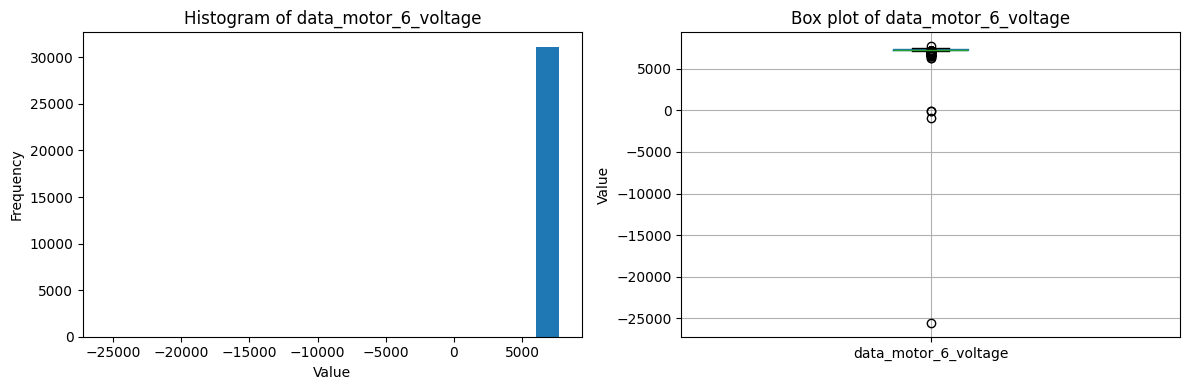

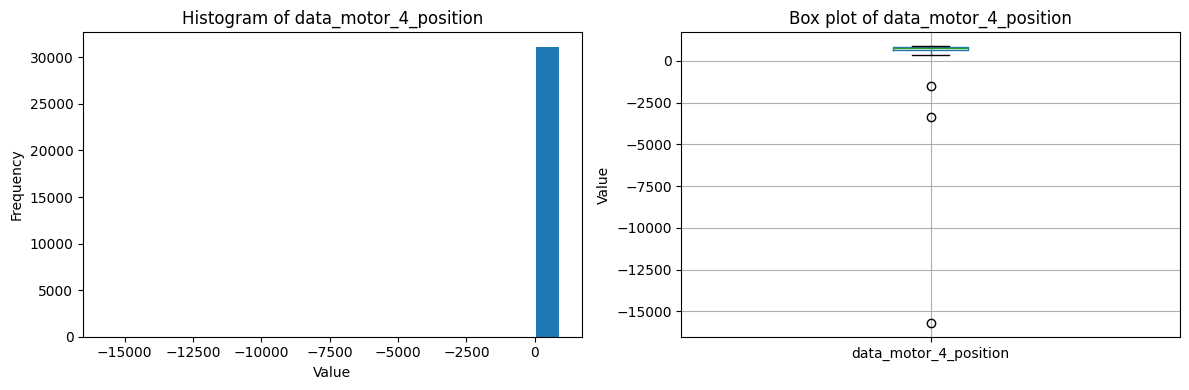

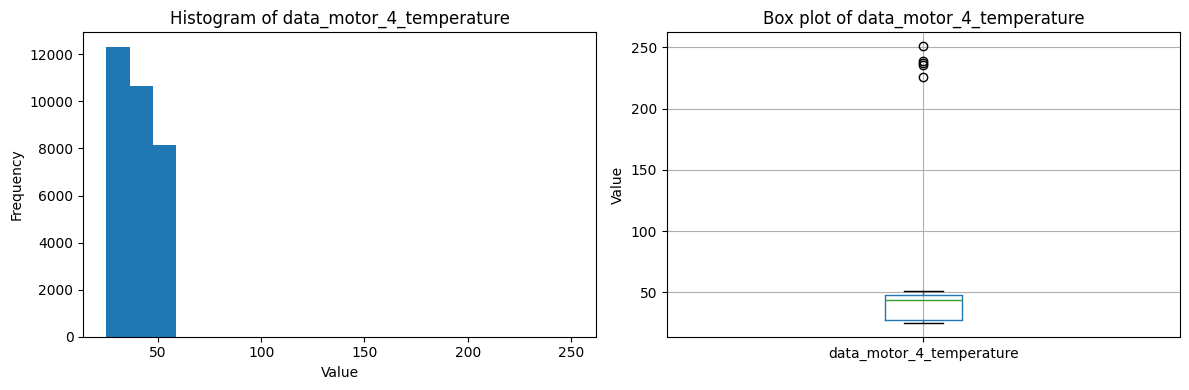

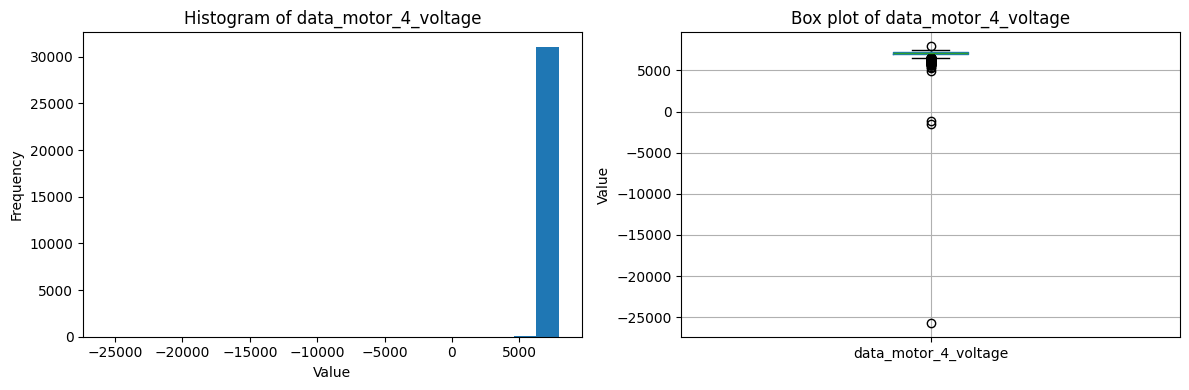

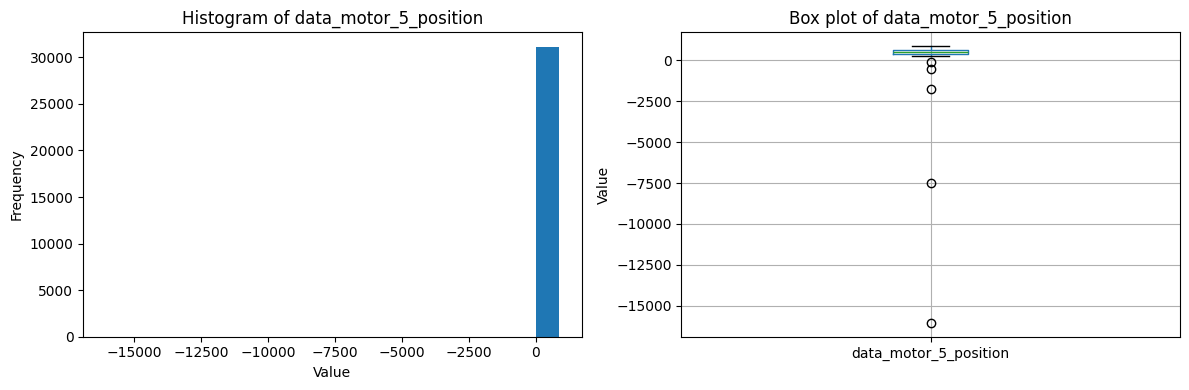

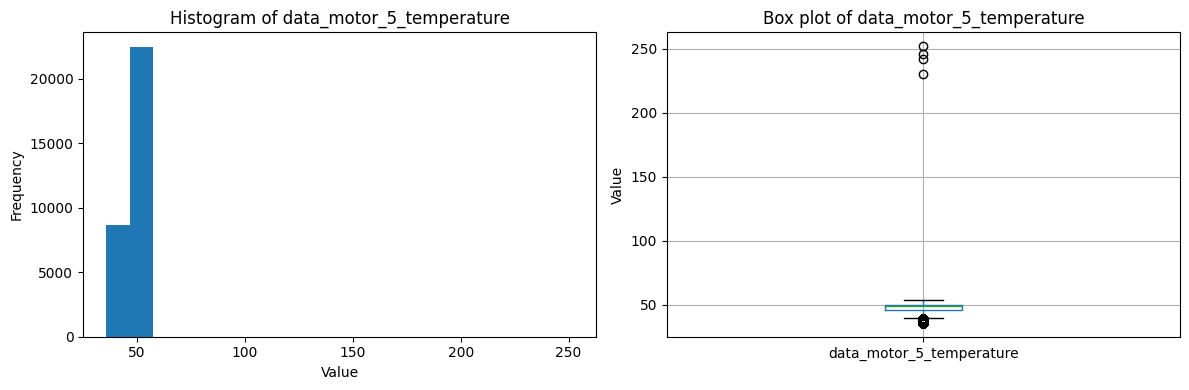

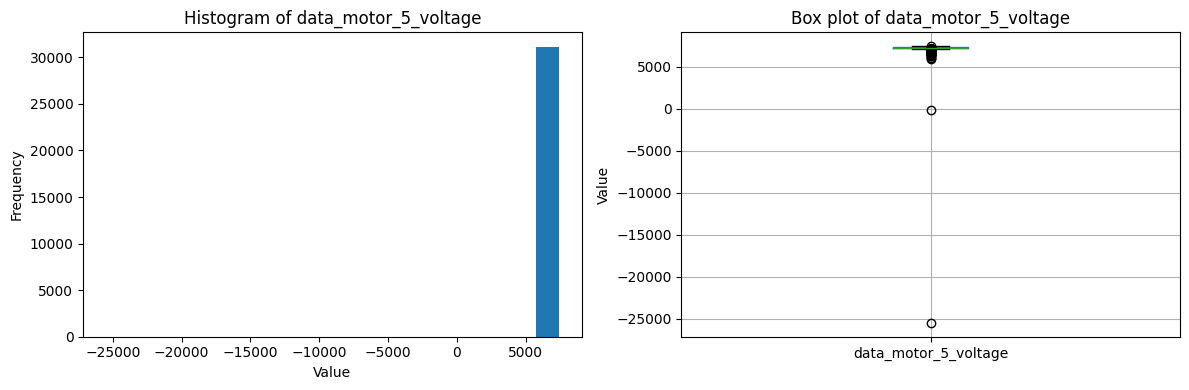

In [13]:
import matplotlib.pyplot as plt

for col in df_data.columns:
    if col.startswith('data_') and "label" not in col:
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns
        
        # Histogram
        axes[0].hist(df_data[col], bins=20)
        axes[0].set_title(f'Histogram of {col}')
        axes[0].set_xlabel('Value')
        axes[0].set_ylabel('Frequency')
        
        # Box plot
        df_data.boxplot(column=[col], ax=axes[1])
        axes[1].set_title(f'Box plot of {col}')
        axes[1].set_ylabel('Value')
        
        plt.tight_layout()  
        plt.show()

## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Separate the features (X) and the target variable (y)
X = df.drop(['label', 'sequence_idx', 'time'], axis=1)
y = df['label']

# Perform PCA to reduce the dimensionality to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Class 0')
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Class 1')
plt.title('2D PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```

# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

## Task 2: Define a strategy to remove outliers.

Explain how you remove the outliers and implement your approach here.

## Task 3: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?


